## Setup

### Download dataset

In [ ]:
from huggingface_hub import hf_hub_download

In [ ]:
hf_hub_download(repo_id="hotamago/bkai-vietnamese-handwritten-ORC", filename="training_data.zip", repo_type="dataset")

### Import libraries

In [1]:
import tensorflow as tf
from common import *
import matplotlib.pyplot as plt
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#     # RIP Training time
#     raise SystemError('GPU device not found')
#     print('Found GPU at: {}'.format(device_name))

### Extract zip

In [ ]:
TRAIN_DATA_ZIP_PATH = "data/training_data.zip"

In [ ]:
import zipfile
with zipfile.ZipFile(TRAIN_DATA_ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall("vietnamese_hcr/raw")

### Constants

In [2]:
import pathlib
# finding where we are so we dont need to type absolute path everytime
current_directory_path = pathlib.Path("./vietnamese_hcr").absolute()
current_directory_path

WindowsPath('c:/backup/data/AI Hota/BKAI/Vietnamese Handwritten Text Recognition/vietnamese_hcr')

In [3]:
import os
# path to our directory images

# our train and test folder (not used for now but used later when we want to save images after processing)
DATA_PATH = os.path.join(str(current_directory_path), "data")
TEST_FOLDER = os.path.join(DATA_PATH, "test")
TRAIN_FOLDER = os.path.join(DATA_PATH, "train")

# our raw folders
RAW_FOLDER = os.path.join(str(current_directory_path),"raw")
RAW_DATA_FOLDER = os.path.join(RAW_FOLDER,"data")

# label json files
LABEL_PATH = os.path.join(RAW_FOLDER, "labels.txt")

In [4]:
if not os.path.exists(TEST_FOLDER):
    os.makedirs(TEST_FOLDER)
if not os.path.exists(TRAIN_FOLDER):
    os.makedirs(TRAIN_FOLDER)

### Preprocessing labels

In [5]:
Label_data = []
# open these raw label files
with open(LABEL_PATH, 'r', encoding='utf8') as f:
    s = f.read()
    Label_data = s.split('\n')

In [6]:
for i in range(len(Label_data)):
    obj = Label_data[i].split('\t')
    Label_data[i] = {
        'name': obj[0],
        'text': obj[1]
    }

### Get info from data

In [22]:
max_label_len = 0

# find the maximum label length
for label in Label_data:
    max_label_len = max(len(label['text']), max_label_len)

max_label_len

17

In [23]:
# find all characters in labels (so we don't blindly add chacters not even existed in our dataset)
char_list = set()
for label in Label_data:
    char_list.update(set(label["text"]))
char_list = sorted(char_list)
len(char_list)

187

In [24]:
# show all possible labels characters
"".join(char_list)

'-ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝàáâãèéêìíòóôõùúýĂăĐđĨĩŨũƠơƯưẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ'

In [ ]:
import numpy as np

# lists for training dataset
resize_max_width=0
i=0
for label in Label_data:
    train_img_path = os.path.join(RAW_DATA_FOLDER, label['name'])

    # read input image and convert into gray scale image
    img = cv2.cvtColor(cv2.imread(train_img_path), cv2.COLOR_BGR2GRAY)
    
    height, width = img.shape

    # in this dataset, we don't need to do any resize at all here.
    img = cv2.resize(img,(int(100/height*width), 100))
    
    height, width = img.shape
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]

    i+=1
    if (i%500 == 0):
        print ("has processed trained {} files".format(i))

print(resize_max_width)

Max width image in training images is 766, so I set 800 for pertty :V
Max length label is 17, again I set 20 for pertty :V

### Testing

In [8]:
pad_listint(encodeText("hello"))

array([34, 31, 38, 38, 41, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [9]:
decodeText(pad_listint(encodeText("hello")))

'hello'

In [10]:
calCER("hello", "hallo")

1

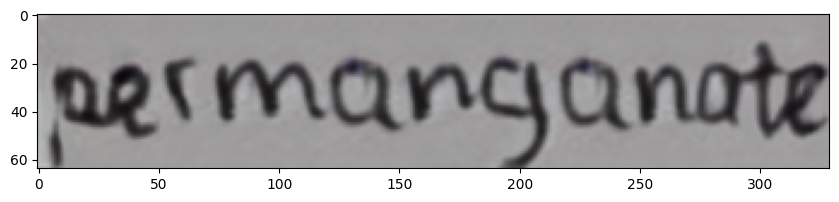

514


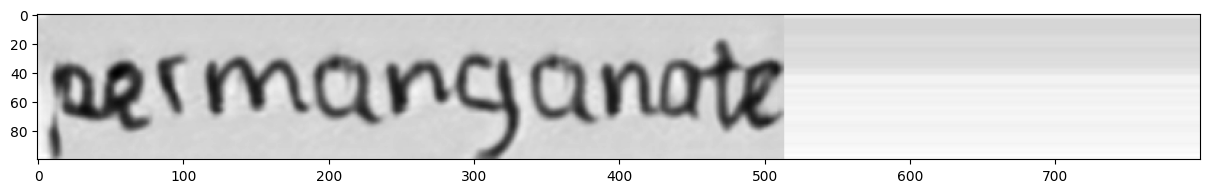

514


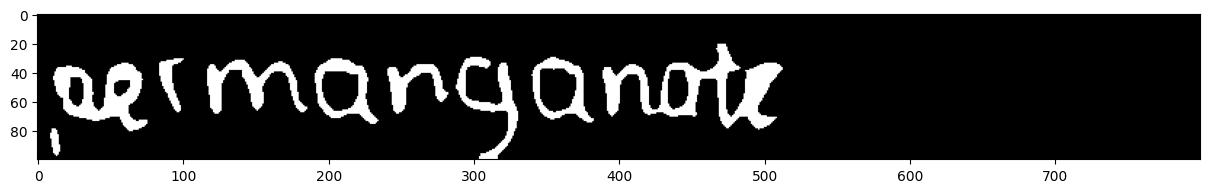

In [11]:
img = cv2.imread(os.path.join(RAW_DATA_FOLDER, Label_data[102987]['name']))
imgShow(img)

imgShow(autoResize(img, size = (800, 100)))

niceImage = orcPreprocess(img, default_fixed_size = (800, 100), default_filter_size = (5, 5))
imgShow(niceImage)

## Import

In [7]:
# BUILD THE PIPELINE FOR THE IMAGES, definitely this is super basic pipeline and can be improved
import numpy as np

## Constants

In [8]:
fixed_size = (800, 100)
fixed_length = 20

## Loading data

In [10]:
# being a good Data Scientist, we need to have train set and test set
from sklearn.model_selection import train_test_split
test_size = 0.2
train_label_data, val_label_data = train_test_split(Label_data, test_size=test_size, random_state=42)

In [11]:
# lists for training dataset
training_img = []
training_label = []

# Load images
i=0
for label in train_label_data:
    train_img_path = os.path.join(RAW_DATA_FOLDER, label['name'])

    # read input image and convert into gray scale image
    img = cv2.imread(train_img_path)
    
    # Process Image
    niceImage = orcPreprocess(img, default_fixed_size = fixed_size, default_filter_size = (5, 5))
    
    # Add labels
    training_img.append(niceImage)
    training_label.append(label['text'])

    i+=1
    if (i%500 == 0):
        print ("has processed trained {} files".format(i))

has processed trained 500 files
has processed trained 1000 files
has processed trained 1500 files
has processed trained 2000 files
has processed trained 2500 files
has processed trained 3000 files
has processed trained 3500 files
has processed trained 4000 files
has processed trained 4500 files
has processed trained 5000 files
has processed trained 5500 files
has processed trained 6000 files
has processed trained 6500 files
has processed trained 7000 files
has processed trained 7500 files
has processed trained 8000 files
has processed trained 8500 files
has processed trained 9000 files
has processed trained 9500 files
has processed trained 10000 files
has processed trained 10500 files
has processed trained 11000 files
has processed trained 11500 files
has processed trained 12000 files
has processed trained 12500 files
has processed trained 13000 files
has processed trained 13500 files
has processed trained 14000 files
has processed trained 14500 files
has processed trained 15000 files


In [12]:
#lists for validation dataset
valid_img = []
valid_label = []

# Load images
i=0
for label in val_label_data:
    train_img_path = os.path.join(RAW_DATA_FOLDER, label['name'])

    # read input image and convert into gray scale image
    img = cv2.imread(train_img_path)
    
    # Process Image
    niceImage = orcPreprocess(img, default_fixed_size = fixed_size, default_filter_size = (5, 5))
    
    # Add labels
    valid_img.append(niceImage)
    valid_label.append(label['text'])

    i+=1
    if (i%500 == 0):
        print ("has processed trained {} files".format(i))

has processed trained 500 files
has processed trained 1000 files
has processed trained 1500 files
has processed trained 2000 files
has processed trained 2500 files
has processed trained 3000 files
has processed trained 3500 files
has processed trained 4000 files
has processed trained 4500 files
has processed trained 5000 files
has processed trained 5500 files
has processed trained 6000 files
has processed trained 6500 files
has processed trained 7000 files
has processed trained 7500 files
has processed trained 8000 files
has processed trained 8500 files
has processed trained 9000 files
has processed trained 9500 files
has processed trained 10000 files
has processed trained 10500 files
has processed trained 11000 files
has processed trained 11500 files
has processed trained 12000 files
has processed trained 12500 files
has processed trained 13000 files
has processed trained 13500 files
has processed trained 14000 files
has processed trained 14500 files
has processed trained 15000 files


## Build model

In [13]:
# import our model, different layers and activation function 
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [25]:
# OUR FULL MODEL OF CRNN AND LSTM

# input with shape of height=100 and width=800 
inputs = Input(shape=(fixed_size[1],fixed_size[0],1))
 
# Block 1
x = Conv2D(64, (3,3), padding='same')(inputs)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_1 = x 

# Block 2
x = Conv2D(128, (3,3), padding='same')(x)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_2 = x

# Block 3
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_3 = x

# Block4
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_3])
x = Activation('relu')(x)
x_4 = x

# Block5
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_5 = x

# Block6
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_5])
x = Activation('relu')(x)

# Block7
x = Conv2D(1024, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(3, 1))(x)
x = Activation('relu')(x)

# pooling layer with kernel size (2,2) to make the height/2 #(1,9,512)
x = MaxPool2D(pool_size=(3, 1))(x)
 
# # to remove the first dimension of one: (1, 31, 512) to (31, 512) 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(x)
 
# # # bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(blstm_1)

# # this is our softmax character proprobility with timesteps 
outputs = Dense(len(char_list) + 1, activation = 'softmax')(blstm_2)

# model to be used at test time

act_model = Model(inputs, outputs)

In [26]:
act_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100, 800, 1)]        0         []                            
                                                                                                  
 conv2d_14 (Conv2D)          (None, 100, 800, 64)         640       ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_8 (MaxPoolin  (None, 33, 266, 64)          0         ['conv2d_14[0][0]']           
 g2D)                                                                                             
                                                                                                  
 activation_14 (Activation)  (None, 33, 266, 64)          0         ['max_pooling2d_8[0][0]'

In [27]:
### ctc definition part 
"""
The reason why we use ctc_batch_cost instead of ctc_cost because
In batch cost, the program managed to mask out padded sequence using label_length, 
So the cost won't include the padding 0 section.
"""

"""
The way CTC is modelled currently in Keras is that you need to implement the loss function as a layer, you did that already (loss_out). 
Your problem is that the inputs you give that layer are not tensors from Theano/TensorFlow but numpy arrays.
To change that one option is to model these values as inputs to your model.
That is why we need to manually create Input for labels, input length and label_length.
"""

# define the label input shape for ctc
labels = Input(name='the_labels', shape=[fixed_length], dtype='float32')

"""
where input_length and label_length are constants you created previously
the easiest way here is to have a fixed batch size in training 
the lengths should have the same batch size (see shapes in the link for ctc_cost)   
"""

# define the length of input and label for ctc
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 
# define a ctc lambda function to take arguments and return ctc_bach_cost
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    """
    labels: tensor (number of samples, max_string_length) containing the truth labels.
    y_pred: tensor (number of samples, time_steps, num_character_labels) containing the prediction, or output of the softmax.
    input_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_pred.
    label_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_true.
    """
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
# out loss function (just take the inputs and put it in our ctc_batch_cost)
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [28]:
# ready ctc loss function and optimizers
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')

# our callbacks hell to optimize our learning
callbacks = [
    TensorBoard(
        log_dir='./logs',
        histogram_freq=10,
        profile_batch=0,
        write_graph=True,
        write_images=False,
        update_freq="epoch"),
    ModelCheckpoint(
        filepath=os.path.join('checkpoint_weights.hdf5'),
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True,
        verbose=1),
    EarlyStopping(
        monitor='val_loss',
        min_delta=1e-8,
        patience=20,
        restore_best_weights=True,
        verbose=1),
    ReduceLROnPlateau(
        monitor='val_loss',
        min_delta=1e-8,
        factor=0.2,
        patience=10,
        verbose=1)
]
callbacks_list = callbacks

In [29]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100, 800, 1)]        0         []                            
                                                                                                  
 conv2d_14 (Conv2D)          (None, 100, 800, 64)         640       ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_8 (MaxPoolin  (None, 33, 266, 64)          0         ['conv2d_14[0][0]']           
 g2D)                                                                                             
                                                                                                  
 activation_14 (Activation)  (None, 33, 266, 64)          0         ['max_pooling2d_8[0][0]'

In [30]:
train_input_length = []
train_label_length = []
for label in training_label:
    train_input_length.append(fixed_length)
    train_label_length.append(len(label))

valid_input_length = []
valid_label_length = []
for label in valid_label:
    valid_input_length.append(fixed_length)
    valid_label_length.append(len(label))

In [35]:
train_padded_txt = []
for label in training_label:
    train_padded_txt.append(pad_listint(encodeText(label)) + 1)

valid_padded_txt = []
for label in valid_label:
    valid_padded_txt.append(pad_listint(encodeText(label)) + 1)

In [48]:
train_padded_txt = np.array(train_padded_txt)
valid_padded_txt = np.array(valid_padded_txt)

In [31]:
# notice I convert everything to numpy array here since model can fit either tensors and numpy array
# the reason why i stick with numpy array because it is simple to code and also because it is baseline solution
# I want to use openCV (can't run with tensors because it is CPU operations)
# And if I want to use tensors then i will make sure my image preprocessing functions uses tensor compatible operations

# ready our training data
training_img = np.array(training_img)
train_input_length = np.array(train_input_length)  # all must be equal length to T timesteps
train_label_length = np.array(train_label_length)  # different length (only the same in Captcha dataset)

# ready our validating data
valid_img = np.array(valid_img)
valid_input_length = np.array(valid_input_length) # all must be equal length to T timesteps
valid_label_length = np.array(valid_label_length) # different length (only the same in Captcha dataset)

In [49]:
print(training_img.shape, train_padded_txt.shape, train_input_length.shape, train_label_length.shape)
print(valid_img.shape, valid_padded_txt.shape, valid_input_length.shape, valid_label_length.shape)

(82400, 100, 800) (82400, 20) (82400,) (82400,)


In [50]:
# choose batchsize and epochs

batch_size = 32
epochs = 100

history = model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], 
          y=np.zeros(len(training_img)),
          batch_size=batch_size, 
          epochs = epochs,
          validation_data = ([valid_img, valid_padded_txt, valid_input_length, valid_label_length], [np.zeros(len(valid_img))]),
          verbose = 1, callbacks = callbacks_list)

Epoch 1/100
  30/2575 [..............................] - ETA: 12:27:43 - loss: 21.9949

KeyboardInterrupt: 

## Saved model

In [ ]:
act_model.save_weights(os.path.join('pretrained', 'checkpoint_weights.hdf5'))

## Evalution

In [ ]:
# load the saved best model weights
act_model.load_weights(os.path.join('pretrained', 'checkpoint_weights.hdf5'))

In [ ]:
# predict outputs on validation images
NO_PREDICTS = 100
OFFSET=0
# prediction = act_model.predict(valid_img[OFFSET:OFFSET+NO_PREDICTS])
prediction = act_model.predict(valid_img)

In [ ]:
# NO_PREDICTS image results
# 9 timesteps
# 32 chars + 1 blank
prediction.shape

In [ ]:
# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
# see the results
all_predictions =[]
i = 0
for x in out:
    print("original_text  = ", valid_label[i+OFFSET]['text'])
    print("predicted text = ", end = '')
    pred = ""
    for p in x:  
        if int(p) != -1:
            pred += char_list[int(p)]
    print(pred)
    all_predictions.append(pred)
    i+=1

In [ ]:
#YOUR PART: WRITE TO PRINT OUT THE IMAGES IN NICE 2D ARRAY PLOT WITH ORIGINAL TEXT AND PREDICTED TEXT 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,200))
col=0
row=1
gs1 = gridspec.GridSpec(NO_PREDICTS, 1)
# gs1.update(wspace=0.025, hspace=0.025)
for n in range(NO_PREDICTS):
    plt.subplot(gs1[n])
    plt.imshow(valid_img[n][:,:,0], cmap="gray_r")
    plt.title(f"Label {n}: "+valid_label[n+OFFSET]['text'], fontsize=20, color="green")
    plt.xlabel(f"Prediction {n}: "+all_predictions[n+OFFSET], fontsize=20, color="red")


In [ ]:
import string
import unicodedata
import editdistance


def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""

    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))

        pd_cer, gt_cer = list(pd.lower()), list(gt.lower())
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd.lower().split(), gt.lower().split()
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))

        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))

    cer_f = sum(cer) / len(cer)
    wer_f = sum(wer) / len(wer)
    ser_f = sum(ser) / len(ser)

    return (cer_f, wer_f, ser_f)

In [ ]:
evaluate = ocr_metrics(predicts=all_predictions,
                                  ground_truth=valid_orig_txt,
                                  norm_accentuation=False,
                                  norm_punctuation=False)

e_corpus = "\n".join([
    "Metrics:",
    "Character Error Rate: {}".format(evaluate[0]),
    "Word Error Rate:      {}".format(evaluate[1]),
    "Sequence Error Rate:  {}".format(evaluate[2]),
])

In [ ]:
print(e_corpus)